# <font color=blue>Assignments for "Simple Linear Regression"</font>

Now, it's your turn to design your first regression model. In this module, you'll be using a version of the ["House Prices" dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) from Kaggle. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

**(1)** Investigate the data and do any necessary data cleaning.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import seaborn as sns
import scipy.stats as stats
from statistics import mean 
from scipy.stats.mstats import winsorize


from pandas.api.types import is_numeric_dtype


import warnings



warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None
df = pd.read_csv('data/House_Prices.csv',  low_memory=False)


In [3]:
for col in df:
    print(df[col].name,"= ",df[col].nunique())

Id =  1460
MSSubClass =  15
MSZoning =  5
LotFrontage =  110
LotArea =  1073
Street =  2
Alley =  2
LotShape =  4
LandContour =  4
Utilities =  2
LotConfig =  5
LandSlope =  3
Neighborhood =  25
Condition1 =  9
Condition2 =  8
BldgType =  5
HouseStyle =  8
OverallQual =  10
OverallCond =  9
YearBuilt =  112
YearRemodAdd =  61
RoofStyle =  6
RoofMatl =  8
Exterior1st =  15
Exterior2nd =  16
MasVnrType =  4
MasVnrArea =  327
ExterQual =  4
ExterCond =  5
Foundation =  6
BsmtQual =  4
BsmtCond =  4
BsmtExposure =  4
BsmtFinType1 =  6
BsmtFinSF1 =  637
BsmtFinType2 =  6
BsmtFinSF2 =  144
BsmtUnfSF =  780
TotalBsmtSF =  721
Heating =  6
HeatingQC =  5
CentralAir =  2
Electrical =  5
1stFlrSF =  753
2ndFlrSF =  417
LowQualFinSF =  24
GrLivArea =  861
BsmtFullBath =  4
BsmtHalfBath =  3
FullBath =  4
HalfBath =  3
BedroomAbvGr =  8
KitchenAbvGr =  4
KitchenQual =  4
TotRmsAbvGrd =  12
Functional =  7
Fireplaces =  4
FireplaceQu =  5
GarageType =  6
GarageYrBlt =  97
GarageFinish =  3
GarageCa

In [4]:
def fix_missing(df, col, name):
    if is_numeric_dtype(col):
        df[name] = col.fillna(col.median())

In [5]:
for n, c in df.items():
        fix_missing(df, c, n)

In [6]:
df["Street"]=pd.get_dummies(df["Street"], drop_first=True)
df["Alley"]=pd.get_dummies(df["Alley"], drop_first=True)
df["Utilities"]=pd.get_dummies(df["Utilities"], drop_first=True)
df["CentralAir"]=pd.get_dummies(df["CentralAir"], drop_first=True)

In [7]:
df["BldgType"]=df.BldgType.replace({'1Fam':0, "2fmCon":1,'Duplex':2, "TwnhsE":3,"Twnhs":4})


In [8]:
df["Heating"].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

In [9]:
df["Heating"]=df.Heating.replace({'GasA':0, "GasW":1,'Grav':2, "Wall":3,"OthW":4,"Floor":5})


In [10]:
df["Heating"].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [11]:
df["GarageType"].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [12]:
df["GarageType"]=df.GarageType.replace({'Attchd':0, "Detchd":1,'BuiltIn':2, "CarPort":3,"2Types":4,"Basment":5})

In [13]:
for col in df:
    print(df[col].name,"= ",sum(pd.isnull(df[col])))

Id =  0
MSSubClass =  0
MSZoning =  0
LotFrontage =  0
LotArea =  0
Street =  0
Alley =  0
LotShape =  0
LandContour =  0
Utilities =  0
LotConfig =  0
LandSlope =  0
Neighborhood =  0
Condition1 =  0
Condition2 =  0
BldgType =  0
HouseStyle =  0
OverallQual =  0
OverallCond =  0
YearBuilt =  0
YearRemodAdd =  0
RoofStyle =  0
RoofMatl =  0
Exterior1st =  0
Exterior2nd =  0
MasVnrType =  8
MasVnrArea =  0
ExterQual =  0
ExterCond =  0
Foundation =  0
BsmtQual =  37
BsmtCond =  37
BsmtExposure =  38
BsmtFinType1 =  37
BsmtFinSF1 =  0
BsmtFinType2 =  38
BsmtFinSF2 =  0
BsmtUnfSF =  0
TotalBsmtSF =  0
Heating =  0
HeatingQC =  0
CentralAir =  0
Electrical =  1
1stFlrSF =  0
2ndFlrSF =  0
LowQualFinSF =  0
GrLivArea =  0
BsmtFullBath =  0
BsmtHalfBath =  0
FullBath =  0
HalfBath =  0
BedroomAbvGr =  0
KitchenAbvGr =  0
KitchenQual =  0
TotRmsAbvGrd =  0
Functional =  0
Fireplaces =  0
FireplaceQu =  690
GarageType =  81
GarageYrBlt =  0
GarageFinish =  81
GarageCars =  0
GarageArea =  0
Ga

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   uint8  
 6   Alley          1460 non-null   uint8  
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   uint8  
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,1,0,Reg,Lvl,0,Inside,Gtl,CollgCr,Norm,Norm,0,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,0,Ex,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,0.0,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,1,0,Reg,Lvl,0,FR2,Gtl,Veenker,Feedr,Norm,0,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,0,Ex,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,0.0,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,1,0,IR1,Lvl,0,Inside,Gtl,CollgCr,Norm,Norm,0,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,0,Ex,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,0.0,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,1,0,IR1,Lvl,0,Corner,Gtl,Crawfor,Norm,Norm,0,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,0,Gd,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,1.0,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,1,0,IR1,Lvl,0,FR2,Gtl,NoRidge,Norm,Norm,0,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,0,Ex,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,0.0,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
dfcorr=df[["OverallQual","MSSubClass","GarageCars","GarageArea","SalePrice","GrLivArea"]].corr()

In [17]:
df.groupby("Street")["SalePrice"].mean().index

UInt64Index([0, 1], dtype='uint64', name='Street')

**(2)** Explore the data and find some variables that you think would be useful in the prediction of the house prices.


<BarContainer object of 6 artists>

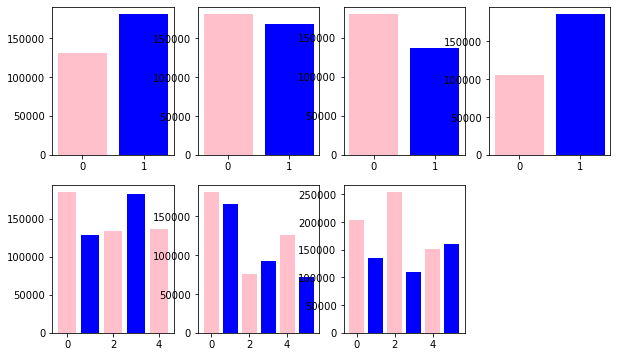

In [18]:
plt.figure(figsize=(10,6))

plt.subplot(2,4,1)
plt.bar(df.groupby("Street")["SalePrice"].mean().index, 
        df.groupby("Street")["SalePrice"].mean(),
        color=("pink","blue"))
plt.xticks([0,1])

plt.subplot(2,4,2)
plt.bar(df.groupby("Alley")["SalePrice"].mean().index, 
        df.groupby("Alley")["SalePrice"].mean(),
        color=("pink","blue"))
plt.xticks([0,1])

plt.subplot(2,4,3)
plt.bar(df.groupby("Utilities")["SalePrice"].mean().index, 
        df.groupby("Utilities")["SalePrice"].mean(),
        color=("pink","blue"))
plt.xticks([0,1])

plt.subplot(2,4,4)
plt.bar(df.groupby("CentralAir")["SalePrice"].mean().index, 
        df.groupby("CentralAir")["SalePrice"].mean(),
        color=("pink","blue"))
plt.xticks([0,1])

plt.subplot(2,4,5)
plt.bar(df.groupby("BldgType")["SalePrice"].mean().index, 
        df.groupby("BldgType")["SalePrice"].mean(),
        color=("pink","blue"))


plt.subplot(2,4,6)
plt.bar(df.groupby("Heating")["SalePrice"].mean().index, 
        df.groupby("Heating")["SalePrice"].mean(),
        color=("pink","blue"))

plt.subplot(2,4,7)
plt.bar(df.groupby("GarageType")["SalePrice"].mean().index, 
        df.groupby("GarageType")["SalePrice"].mean(),
        color=("pink","blue"))

Text(0.5, 1.0, 'Correlation')

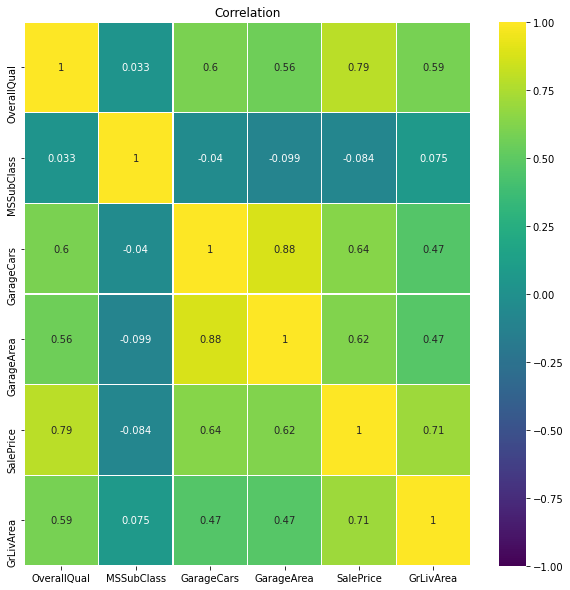

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(dfcorr, annot=True, linewidths=.1, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation")

**(3)** Build your initial model using these features and estimate the parameters using OLS.

In [20]:
from sklearn import linear_model
Y = df['SalePrice']
X = df[['Street','CentralAir','Heating',"OverallQual","MSSubClass","GarageCars","GarageArea","GrLivArea"]]

In [21]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression()

In [22]:
print('Coefficients: \n', lrm.coef_)
print('Intercept (bias): \n', lrm.intercept_)

Coefficients: 
 [-8.84343223e+02  1.05940570e+04 -1.82511470e+03  2.67071708e+04
 -2.06323845e+02  1.31087826e+04  2.65582484e+01  5.24248250e+01]
Intercept (bias): 
 -94362.02457182729


In [23]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     559.7
Date:                Tue, 15 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:23:42   Log-Likelihood:                -17516.
No. Observations:                1460   AIC:                         3.505e+04
Df Residuals:                    1451   BIC:                         3.510e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.436e+04   1.68e+04     -5.607      0.000   -1.27e+05   -6.14e+04
Street       -884.3432   1.63e+04     -0.054      0.957   -3.29e+04    3.11e+04
CentralAir   1.059e+04   4853.473      2.183      0.029    1073.484    2.01e+04
Heating     -1825.1147   3739.022     -0.488      0.626   -9159.581    5509.352
OverallQual  2.671e+04   1064.668     25.085      0.000    2.46e+04    2.88e+04
MSSubClass   -206.3238     24.983     -8.259      0.000    -255.330    -157.318
GarageCars   1.311e+04   3061.009      4.283      0.000    7104.307    1.91e+04
GarageArea     26.5582     10.535      2.521      0.012       5.893      47.224
GrLivArea      52.4248      2.519     20.809      0.000      47.483      57.367
==============================================================================
Omnibus:                      430.404   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14278.795
Skew:                           0.703   Prob(JB):                         0.00
Kurtosis:                      18.256   Cond. No.                     3.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## ----------------------------------------------------------------------------------------------------------

# A_03_assumptions_of_linear_regression

To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

- Load the **houseprices** data from Kaggle. 
- Reimplement the model you built in the previous lesson. 
- Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.


Coefficients: 
 [ 0.00000000e+00 -8.84343223e+02  1.05940570e+04 -1.82511470e+03
  2.67071708e+04 -2.06323845e+02  1.31087826e+04  2.65582484e+01
  5.24248250e+01]

Intercept: 
 -94362.02457182397


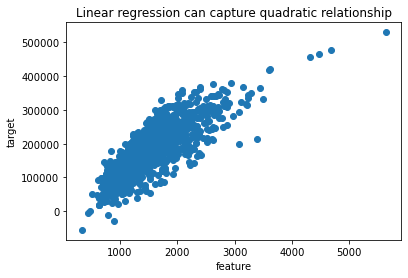

In [112]:

# we fit a linear regression where target is Y
# and features are X and X^2
lrm_example = linear_model.LinearRegression()
lrm_example.fit(X,Y)

# predictions of the linear regression
predictions = lrm_example.predict(X)


# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

# we plot the estimated Y and X
# the relationship should be quadratic
plt.scatter(X["GrLivArea"], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

#df[['Street','CentralAir','Heating',"OverallQual","MSSubClass","GarageCars","GarageArea","GrLivArea"]]

In [120]:

errors = Y - predictions


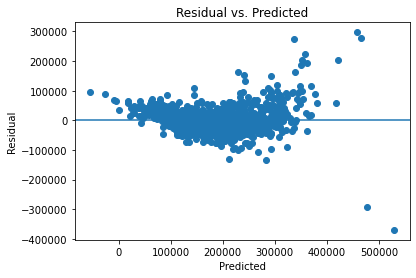

In [121]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [122]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 440.445 and p value is 8.66e-98
Levene test statistic value is 438.324 and p value is 8.6e-91


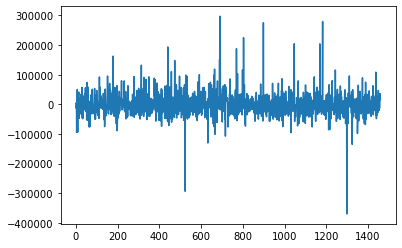

In [123]:
plt.plot(errors)
plt.show()

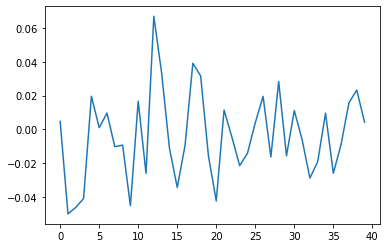

In [124]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

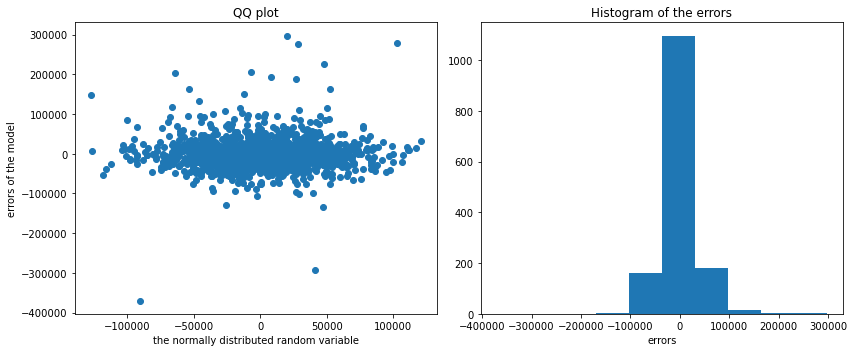

In [125]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()


# ------------------------------------------------------------------------------------------

# A_04_understanding_the_relationship



In [26]:
import statsmodels.api as sm

Y = df['SalePrice']
X = df[['Street','CentralAir','Heating',"OverallQual","MSSubClass","GarageCars","GarageArea","GrLivArea"]]


X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()

# We print the summary results
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     559.7
Date:                Tue, 15 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:27:35   Log-Likelihood:                -17516.
No. Observations:                1460   AIC:                         3.505e+04
Df Residuals:                    1451   BIC:                         3.510e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.436e+04   1.68e+04     -5.607      0.000   -1.27e+05   -6.14e+04
Street       -884.3432   1.63e+04     -0.054      0.957   -3.29e+04    3.11e+04
CentralAir   1.059e+04   4853.473      2.183      0.029    1073.484    2.01e+04
Heating     -1825.1147   3739.022     -0.488      0.626   -9159.581    5509.352
OverallQual  2.671e+04   1064.668     25.085      0.000    2.46e+04    2.88e+04
MSSubClass   -206.3238     24.983     -8.259      0.000    -255.330    -157.318
GarageCars   1.311e+04   3061.009      4.283      0.000    7104.307    1.91e+04
GarageArea     26.5582     10.535      2.521      0.012       5.893      47.224
GrLivArea      52.4248      2.519     20.809      0.000      47.483      57.367
==============================================================================
Omnibus:                      430.404   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14278.795
Skew:                           0.703   Prob(JB):                         0.00
Kurtosis:                      18.256   Cond. No.                     3.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:

X = df[['CentralAir',"OverallQual","MSSubClass","GarageCars","GarageArea","GrLivArea"]]


X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()

# We print the summary results
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     747.2
Date:                Tue, 15 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:28:02   Log-Likelihood:                -17517.
No. Observations:                1460   AIC:                         3.505e+04
Df Residuals:                    1453   BIC:                         3.508e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.621e+04   5704.372    -16.866      0.000   -1.07e+05    -8.5e+04
CentralAir   1.155e+04   4411.030      2.618      0.009    2894.980    2.02e+04
OverallQual  2.671e+04   1061.931     25.156      0.000    2.46e+04    2.88e+04
MSSubClass   -206.0256     24.943     -8.260      0.000    -254.954    -157.097
GarageCars   1.304e+04   3055.418      4.267      0.000    7043.902     1.9e+04
GarageArea     26.8304     10.483      2.559      0.011       6.267      47.394
GrLivArea      52.3871      2.515     20.832      0.000      47.454      57.320
==============================================================================
Omnibus:                      429.974   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14294.606
Skew:                           0.700   Prob(JB):                         0.00
Kurtosis:                      18.265   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
from sklearn.preprocessing import PolynomialFeatures

X = df[['CentralAir',"OverallQual","MSSubClass","GarageCars","GarageArea","GrLivArea"]]
pm=PolynomialFeatures()
pm.fit(X)


PolynomialFeatures()

In [33]:
pm.fit_transform

<bound method TransformerMixin.fit_transform of PolynomialFeatures()>

In [34]:
x_pol=pm.transform(X)

In [35]:
pm.get_feature_names(X.columns)

['1',
 'CentralAir',
 'OverallQual',
 'MSSubClass',
 'GarageCars',
 'GarageArea',
 'GrLivArea',
 'CentralAir^2',
 'CentralAir OverallQual',
 'CentralAir MSSubClass',
 'CentralAir GarageCars',
 'CentralAir GarageArea',
 'CentralAir GrLivArea',
 'OverallQual^2',
 'OverallQual MSSubClass',
 'OverallQual GarageCars',
 'OverallQual GarageArea',
 'OverallQual GrLivArea',
 'MSSubClass^2',
 'MSSubClass GarageCars',
 'MSSubClass GarageArea',
 'MSSubClass GrLivArea',
 'GarageCars^2',
 'GarageCars GarageArea',
 'GarageCars GrLivArea',
 'GarageArea^2',
 'GarageArea GrLivArea',
 'GrLivArea^2']

In [37]:
x_pol_df=pd.DataFrame(x_pol,columns=pm.get_feature_names(X.columns))


In [38]:
results = sm.OLS(Y, x_pol_df).fit()

# We print the summary results
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     269.9
Date:                Tue, 15 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:39:31   Log-Likelihood:                -17249.
No. Observations:                1460   AIC:                         3.455e+04
Df Residuals:                    1433   BIC:                         3.469e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
1                       1.074e+05   1.58e+04      6.811      0.000    7.65e+04    1.38e+05
CentralAir              1.429e+04   8195.238      1.744      0.081   -1786.144    3.04e+04
OverallQual            -2.447e+04   5197.413     -4.708      0.000   -3.47e+04   -1.43e+04
MSSubClass                -3.6866    169.050     -0.022      0.983    -335.298     327.924
GarageCars             -3.761e+04   1.53e+04     -2.450      0.014   -6.77e+04   -7497.388
GarageArea                40.5089     57.312      0.707      0.480     -71.915     152.933
GrLivArea                 12.9928     11.751      1.106      0.269     -10.058      36.043
CentralAir^2            1.429e+04   8195.238      1.744      0.081   -1786.144    3.04e+04
CentralAir OverallQual -1820.9590   3684.645     -0.494      0.621   -9048.836    5406.918
CentralAir MSSubClass   -134.0423     78.552     -1.706      0.088    -288.131      20.046
CentralAir GarageCars   9202.7617   1.17e+04      0.786      0.432   -1.38e+04    3.22e+04
CentralAir GarageArea    -30.8294     46.071     -0.669      0.503    -121.204      59.545
CentralAir GrLivArea      10.8070      8.588      1.258      0.208      -6.039      27.652
OverallQual^2           1443.8608    627.133      2.302      0.021     213.664    2674.058
OverallQual MSSubClass    17.0330     20.733      0.822      0.411     -23.638      57.704
OverallQual GarageCars   -39.6989   2424.200     -0.016      0.987   -4795.060    4715.662
OverallQual GarageArea    28.4635      7.783      3.657      0.000      13.196      43.731
OverallQual GrLivArea     10.9920      2.443      4.500      0.000       6.200      15.784
MSSubClass^2               1.4164      0.474      2.987      0.003       0.486       2.347
MSSubClass GarageCars   -123.0578     76.273     -1.613      0.107    -272.676      26.560
MSSubClass GarageArea      0.5151      0.272      1.896      0.058      -0.018       1.048
MSSubClass GrLivArea      -0.2643      0.059     -4.518      0.000      -0.379      -0.150
GarageCars^2           -8100.4690   3653.504     -2.217      0.027   -1.53e+04    -933.680
GarageCars GarageArea     48.1090     20.061      2.398      0.017       8.756      87.462
GarageCars GrLivArea      35.6926      4.732      7.542      0.000      26.409      44.976
GarageArea^2              -0.0661      0.041     -1.612      0.107      -0.146       0.014
GarageArea GrLivArea      -0.1310      0.016     -8.032      0.000      -0.163      -0.099
GrLivArea^2               -0.0064      0.003     -2.012      0.044      -0.013      -0.000
==============================================================================
Omnibus:                      372.768   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21294.602
Skew:                    

In [ ]:
P değeri düşük olanları aldığımız zaman sonuç :

In [40]:
results = sm.OLS(Y, x_pol_df[["CentralAir","OverallQual","GarageCars","GarageArea^2","GrLivArea^2","MSSubClass^2","OverallQual GarageArea","OverallQual GrLivArea","MSSubClass GrLivArea","GarageCars GrLivArea","GarageArea GrLivArea"]]).fit()

# We print the summary results
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              4175.
Date:                Tue, 15 Sep 2020   Prob (F-statistic):                        0.00
Time:                        15:45:46   Log-Likelihood:                         -17329.
No. Observations:                1460   AIC:                                  3.468e+04
Df Residuals:                    1449   BIC:                                  3.474e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
CentralAir              3.251e+04   3898.788      8.339      0.000    2.49e+04    4.02e+04
OverallQual             9808.7589   1679.420      5.841      0.000    6514.404    1.31e+04
GarageCars             -2.711e+04   4806.653     -5.639      0.000   -3.65e+04   -1.77e+04
GarageArea^2               0.0577      0.015      3.933      0.000       0.029       0.086
GrLivArea^2                0.0020      0.003      0.692      0.489      -0.004       0.008
MSSubClass^2               0.9346      0.288      3.250      0.001       0.370       1.499
OverallQual GarageArea    16.0104      3.239      4.943      0.000       9.656      22.365
OverallQual GrLivArea      6.8635      1.621      4.233      0.000       3.683      10.044
MSSubClass GrLivArea      -0.2090      0.037     -5.699      0.000      -0.281      -0.137
GarageCars GrLivArea      33.7337      3.072     10.981      0.000      27.708      39.760
GarageArea GrLivArea      -0.1055      0.012     -9.015      0.000      -0.128      -0.083
==============================================================================
Omnibus:                      360.610   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16788.385
Skew:                          -0.266   Prob(JB):                         0.00
Kurtosis:                      19.604   Cond. No.                     1.88e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""